In [5]:
!pip install tensorflow
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.datasets import cifar10,fashion_mnist
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import confusion_matrix , classification_report

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\Hp\\anaconda\\Lib\\site-packages\\tensorflow\\_api\\v2\\compat\\v1\\test\\__init__.py'
Consider using the `--user` option or check the permissions.



  Using cached tensorflow-2.7.0-cp38-cp38-win_amd64.whl (430.8 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorboard-2.7.0-py3-none-any.whl (5.8 MB)
  Using cached absl_py-0.15.0-py3-none-any.whl (132 kB)
  Using cached grpcio-1.41.1-cp38-cp38-win_amd64.whl (3.2 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached Markdown-3.3.4-py3-none-any.whl (97 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Attempting uninstall: keras
    Found existing installation: keras 2.6.0
    Uninstalling keras-2.6.0:
      Successfully uninstalled keras-2.6.0


# PART 1 
[Comparison Between Cifar 10 and Fashion-Mnist]

#### CIFAR10 DATASET

In [ ]:
# Loading CIFAR DATASET
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [ ]:
print("Shape of training data ",x_train.shape)
print("Shape of Test data ",x_test.shape)

Shape of training data  (50000, 32, 32, 3)
Shape of Test data  (10000, 32, 32, 3)


- There are 50000 images in traing set and 10000 images in test set
- Each image has 3 channels (RGB)

-

In [ ]:
print(x_train[100:600].shape)
y_train[100:600].shape

(500, 32, 32, 3)


(500, 1)

In [ ]:
print(y_train.shape)
y_train

(50000, 1)


array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
#converting in to 1D array
y_train=y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [ ]:
y_train.shape

(50000,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
classes[0]

'airplane'

Got the name of the object by passing the index.

In [ ]:
# Visualization of the CIFAR dataset.
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

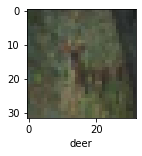

In [ ]:
plot_sample(x_train,y_train,10)

##### Normalizing the training data
normalize the pixels between 0 to 1
To normalize overfitting.

In [ ]:
 x_train=x_train/255

In [ ]:
x_test=x_test/255

### Modeling the CNN for CIFAR 10 Data Set

In [ ]:
# 1 Conv layer and 1 pooling layer.
# Parameters for CNN (feature selection) 
# Filter size for the first Convolution layer is 3x3 (rgb image) 
# Activation = relu
# 2x2 Max pooling

cnn = models.Sequential([
    #1 CONV LAYER
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    #1 POOLING LAYER 
    layers.MaxPooling2D((2, 2)),
    
    #Number of Hidden** layer=1**,Number of neurons in hidden **layer=64**#
    #FCNN
    layers.Flatten(), #input layer for FCC
    layers.Dense(64, activation='relu'), #first hiddin layer  ann
    layers.Dense(10, activation='softmax')])# ouput layer of ann

In [ ]:
opt=tf.keras.optimizers.SGD(
    learning_rate=0.3, momentum=0.4
)
cnn.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7200)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                460864    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 462,410
Trainable params: 462,410
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=cnn.fit(x_train, y_train, epochs=500, batch_size=500,validation_split=0.3)

Epoch 1/500
70/70 [==============================] - 31s 23ms/step - loss: 2.2971 - accuracy: 0.1316 - val_loss: 2.2897 - val_accuracy: 0.1848
Epoch 2/500
70/70 [==============================] - 1s 16ms/step - loss: 2.1774 - accuracy: 0.2035 - val_loss: 2.0412 - val_accuracy: 0.2740
Epoch 3/500
70/70 [==============================] - 1s 15ms/step - loss: 1.9967 - accuracy: 0.2840 - val_loss: 2.0037 - val_accuracy: 0.2640
Epoch 4/500
70/70 [==============================] - 1s 16ms/step - loss: 1.9172 - accuracy: 0.3161 - val_loss: 1.8551 - val_accuracy: 0.3372
Epoch 5/500
70/70 [==============================] - 1s 16ms/step - loss: 2.0470 - accuracy: 0.2595 - val_loss: 1.9093 - val_accuracy: 0.3187
Epoch 6/500
70/70 [==============================] - 1s 15ms/step - loss: 1.8411 - accuracy: 0.3463 - val_loss: 1.8062 - val_accuracy: 0.3561
Epoch 7/500
70/70 [==============================] - 1s 15ms/step - loss: 1.7870 - accuracy: 0.3625 - val_loss: 1.7928 - val_accuracy: 0.3545
Epoch

#### Visualizing the train test Accuracy of CIFAR 10

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


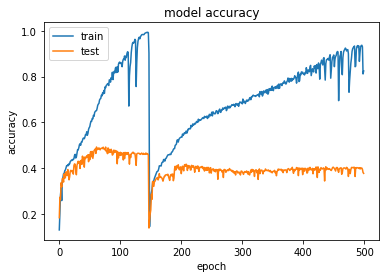

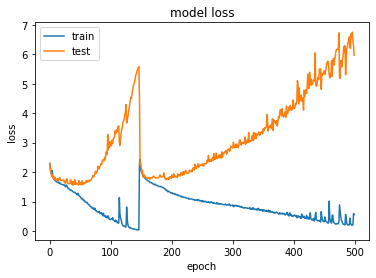

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### Classification Report [CIFAR 10 Dataset]

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report OF model 1: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.46      0.45      0.45      1000
           1       0.49      0.47      0.48      1000
           2       0.28      0.26      0.27      1000
           3       0.23      0.26      0.25      1000
           4       0.31      0.38      0.34      1000
           5       0.29      0.34      0.31      1000
           6       0.43      0.30      0.36      1000
           7       0.45      0.43      0.44      1000
           8       0.50      0.47      0.48      1000
           9       0.45      0.45      0.45      1000

    accuracy                           0.38     10000
   macro avg       0.39      0.38      0.38     10000
weighted avg       0.39      0.38      0.38     10000



#### Interpretation
From above report the model accuracy is 38% which is quite low the model loss decreases at 150 epoch but after 150 loss function again start to arise.

#### Fashion Mnist Dataset
(gray scale)

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(60000, 28, 28)
(10000, 28, 28)
(10000,)
(60000,)


0


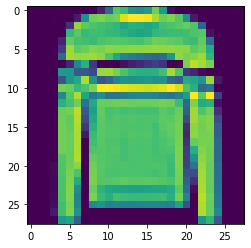

In [ ]:
plt.imshow(x_train[5])
print(y_train[10])

In [ ]:
#setting the label in sequence of index 0:t shirt 1 trouser
classes = ["T-shirt/top","Trouser","Pullover","Dress", "Coat","Sandal","Shirt", "Sneaker","Bag","Ankle boot"]

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

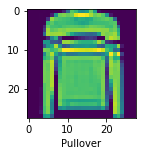

In [ ]:
plot_sample(x_train,y_train,5)

In [ ]:
print(y_train[:6])
y_train.shape

[9 0 0 3 0 2]


(60000,)

In [ ]:
x_test=x_test/255
x_train=x_train/255

In [ ]:
x_test.shape

(10000, 28, 28)

### Modeling the CNN for  Fasion Mnist Dataset

In [ ]:
cnn_Fmnist = models.Sequential([
    #1 CONV LAYER
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28,1)),
    #1 POOLING LAYER 
    layers.MaxPooling2D((2, 2)),
    

    #FCNN
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')])

In [ ]:
cnn_Fmnist.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
x_train= x_train.reshape(-1,28,28,1)

In [ ]:

history=cnn_Fmnist.fit(x_train, y_train, epochs=500,validation_split=0.3)

Epoch 1/500
1313/1313 [==============================] - 38s 6ms/step - loss: 0.4465 - accuracy: 0.8445 - val_loss: 0.3343 - val_accuracy: 0.8828
Epoch 2/500
1313/1313 [==============================] - 8s 6ms/step - loss: 0.2973 - accuracy: 0.8937 - val_loss: 0.2956 - val_accuracy: 0.8963
Epoch 3/500
1313/1313 [==============================] - 7s 5ms/step - loss: 0.2539 - accuracy: 0.9092 - val_loss: 0.3064 - val_accuracy: 0.8906
Epoch 4/500
1313/1313 [==============================] - 7s 5ms/step - loss: 0.2225 - accuracy: 0.9199 - val_loss: 0.2833 - val_accuracy: 0.9016
Epoch 5/500
1313/1313 [==============================] - 7s 5ms/step - loss: 0.1958 - accuracy: 0.9298 - val_loss: 0.2548 - val_accuracy: 0.9113
Epoch 6/500
1313/1313 [==============================] - 7s 5ms/step - loss: 0.1721 - accuracy: 0.9371 - val_loss: 0.2582 - val_accuracy: 0.9123
Epoch 7/500
1313/1313 [==============================] - 7s 5ms/step - loss: 0.1526 - accuracy: 0.9449 - val_loss: 0.2665 - val_a

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


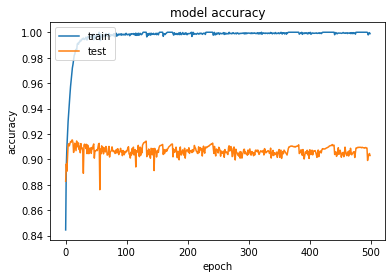

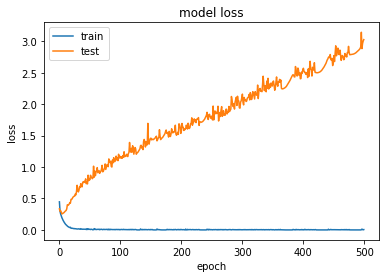

In [ ]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#reshaping the test data
x_test= x_test.reshape(-1,28,28,1)

In [ ]:
cnn_Fmnist.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 3.2463 - accuracy: 0.8968


[3.2463080883026123, 0.8967999815940857]

In [ ]:
y_pred = cnn_Fmnist.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = cnn_Fmnist.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.85      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.85      0.81      0.83      1000
           3       0.91      0.86      0.89      1000
           4       0.81      0.86      0.83      1000
           5       0.98      0.97      0.98      1000
           6       0.71      0.74      0.73      1000
           7       0.95      0.97      0.96      1000
           8       0.97      0.97      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



The model accuracy in fashion mnist dataset is 90% which is quite good and loss function is also controlled because the dataset is grey scale. 

# Summary 
The overall performance of Fasion Mnist data is better as compare to CIFAR-10.
Minst dataset require more tuning also its loss function was not controlled.
Fashion Mnist dataset performs well because it contains grey scale images not rgb.

# Task 2 

In [ ]:
dataset_validation=tf.keras.preprocessing.image_dataset_from_directory(
    'D:/Ayesha/IBA Data Science/Semester 3/DL',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(100, 100),
    shuffle=True,
    seed=233,
    validation_split=0.3,
    subset="validation",
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
  
)

Found 2062 files belonging to 2 classes.
Using 618 files for validation.


In [ ]:
for image_batch, labels_batch in dataset_train:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 100, 100, 3)
(32,)


The image_batch is a tensor of the shape (32, 100, 100, 3). This is a batch of 32 images of shape 100x100x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

In [ ]:
for x,y in dataset_validation:
    print(x.shape,y.shape)

(32, 256, 256, 3) (32,)
(32, 256, 256, 3) (32,)
(32, 256, 256, 3) (32,)
(32, 256, 256, 3) (32,)
(32, 256, 256, 3) (32,)
(32, 256, 256, 3) (32,)
(32, 256, 256, 3) (32,)
(32, 256, 256, 3) (32,)
(32, 256, 256, 3) (32,)
(32, 256, 256, 3) (32,)
(32, 256, 256, 3) (32,)
(32, 256, 256, 3) (32,)
(32, 256, 256, 3) (32,)
(32, 256, 256, 3) (32,)
(32, 256, 256, 3) (32,)
(32, 256, 256, 3) (32,)
(32, 256, 256, 3) (32,)
(32, 256, 256, 3) (32,)
(32, 256, 256, 3) (32,)
(10, 256, 256, 3) (10,)


In [ ]:
class_names = dataset_train.class_names
print(class_names)

['Fake', 'Real']


There are two classes Fake and Real images which need to classify 

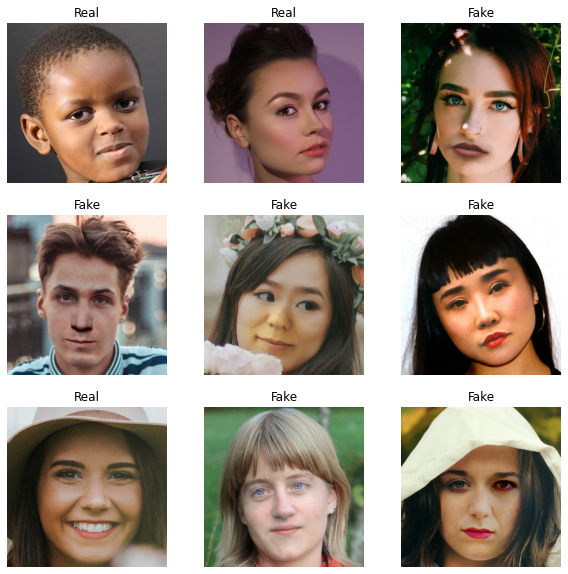

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in dataset_train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

#### Model-1 
# [1(C+P) layer]

In [ ]:
num_classes = 2

img_height=100
img_width=100
model_1 = models.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  
  layers.Conv2D(16, 3, padding='valid', activation='relu'),
  layers.MaxPooling2D(),

 
  #input layer for dense ANN
  layers.Flatten(),
  #hidden layer
  layers.Dense(50, activation='relu'),
  #outputlayer
  layers.Dense(num_classes)
])

In [ ]:
model_1.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 38416)             0         
_________________________________________________________________
dense (Dense)                (None, 50)                1920850   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 102       
Total params: 1,921,400
Trainable params: 1,921,400
Non-trainable params: 0
______________________________________________

In [ ]:
epochs=50
history = model_1.fit(
  dataset_train,
  validation_data=dataset_validation,
  epochs=epochs
)

Epoch 1/50
46/46 [==============================] - 14s 271ms/step - loss: 0.0115 - accuracy: 1.0000 - val_loss: 1.5512 - val_accuracy: 0.5906
Epoch 2/50
46/46 [==============================] - 14s 272ms/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 1.6170 - val_accuracy: 0.5890
Epoch 3/50
46/46 [==============================] - 14s 273ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 1.6025 - val_accuracy: 0.5922
Epoch 4/50
46/46 [==============================] - 14s 273ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 1.6478 - val_accuracy: 0.5922
Epoch 5/50
46/46 [==============================] - 14s 274ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 1.6875 - val_accuracy: 0.5939
Epoch 6/50
46/46 [==============================] - 14s 274ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 1.7319 - val_accuracy: 0.5890
Epoch 7/50
46/46 [==============================] - 14s 273ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 1.7497 - val_accuracy: 0.5971

The accuracy remains 1 for all epochs the loss function is minimum 0.00095 at 25 epoch and then start to rise.

#### Model-2 
# [2 (C+P) layer]

In [ ]:
num_classes = 2

img_height=100
img_width=100
model_2 = models.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  
  layers.Conv2D(16, 3, padding='valid', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, padding='valid', activation='relu'),
  layers.MaxPooling2D(),


 
  #input layer for dense ANN
  layers.Flatten(),
  #hidden layer
  layers.Dense(50, activation='relu'),
  #outputlayer
  layers.Dense(num_classes)
])

In [ ]:
model_2.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 47, 16)        2320      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8464)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)               

In [ ]:
epochs=50
history = model_2.fit(
  dataset_train,
  validation_data=dataset_validation,
  epochs=epochs
)

Epoch 1/50
46/46 [==============================] - 14s 271ms/step - loss: 0.7634 - accuracy: 0.5173 - val_loss: 0.6913 - val_accuracy: 0.5324
Epoch 2/50
46/46 [==============================] - 14s 267ms/step - loss: 0.6916 - accuracy: 0.5346 - val_loss: 0.6905 - val_accuracy: 0.5324
Epoch 3/50
46/46 [==============================] - 14s 268ms/step - loss: 0.6896 - accuracy: 0.5346 - val_loss: 0.6868 - val_accuracy: 0.5324
Epoch 4/50
46/46 [==============================] - 14s 267ms/step - loss: 0.6824 - accuracy: 0.5346 - val_loss: 0.6726 - val_accuracy: 0.5324
Epoch 5/50
46/46 [==============================] - 14s 268ms/step - loss: 0.6673 - accuracy: 0.5769 - val_loss: 0.6693 - val_accuracy: 0.5583
Epoch 6/50
46/46 [==============================] - 14s 266ms/step - loss: 0.6405 - accuracy: 0.6454 - val_loss: 0.6582 - val_accuracy: 0.5890
Epoch 7/50
46/46 [==============================] - 14s 266ms/step - loss: 0.6330 - accuracy: 0.6524 - val_loss: 0.6389 - val_accuracy: 0.6262

   Loss function decreaes with the epochs and accuracy becomes 1.
   But value of loss function of Model 1 is much smaller than Model 2.

#### Model-3 
# (1 Conv,1P ,1- dropout layer)

In [ ]:
num_classes = 2

img_height=100
img_width=100
model_3 = models.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  
  layers.Conv2D(16, 3, padding='valid', activation='relu'),
  layers.MaxPooling2D(),
  


 
  #input layer for dense ANN
  layers.Flatten(),

  #adding drop out layer 
  layers.Dropout(rate=0.3)
  ,
  #hidden layer
  layers.Dense(50, activation='relu'),
  
  #outputlayer
  layers.Dense(num_classes)
])

In [ ]:
model_3.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 49, 49, 16)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 38416)             0         
_________________________________________________________________
dropout (Dropout)            (None, 38416)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                1920850   
_________________________________________________________________
dense_7 (Dense)              (None, 2)                

In [ ]:
epochs=50
history = model_3.fit(
  dataset_train,
  validation_data=dataset_validation,
  epochs=epochs
)

Epoch 1/50
46/46 [==============================] - 15s 277ms/step - loss: 0.7861 - accuracy: 0.5360 - val_loss: 0.6808 - val_accuracy: 0.5550
Epoch 2/50
46/46 [==============================] - 14s 273ms/step - loss: 0.6142 - accuracy: 0.6898 - val_loss: 0.6830 - val_accuracy: 0.5566
Epoch 3/50
46/46 [==============================] - 14s 274ms/step - loss: 0.5104 - accuracy: 0.7729 - val_loss: 0.7049 - val_accuracy: 0.5744
Epoch 4/50
46/46 [==============================] - 14s 274ms/step - loss: 0.4131 - accuracy: 0.8386 - val_loss: 0.7936 - val_accuracy: 0.5728
Epoch 5/50
46/46 [==============================] - 14s 272ms/step - loss: 0.3225 - accuracy: 0.8719 - val_loss: 0.8408 - val_accuracy: 0.5680
Epoch 6/50
46/46 [==============================] - 14s 273ms/step - loss: 0.2348 - accuracy: 0.9273 - val_loss: 0.8738 - val_accuracy: 0.5696
Epoch 7/50
46/46 [==============================] - 14s 270ms/step - loss: 0.1617 - accuracy: 0.9612 - val_loss: 1.0630 - val_accuracy: 0.5841

In [ ]:
y_pred = model_2.predict(dataset_validation)
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories

<tf.Tensor: shape=(618,), dtype=int64, numpy=
array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
     

In [ ]:
print("Classification Report: \n", classification_report(true_categories, predicted_categories))

Classification Report: 
               precision    recall  f1-score   support

           0       0.49      0.40      0.44       289
           1       0.55      0.64      0.59       329

    accuracy                           0.53       618
   macro avg       0.52      0.52      0.52       618
weighted avg       0.52      0.53      0.52       618



The model 3 accuracy is 53%.

#### Model 4 
# (1cov,1 p)  Batch Normalization

In [ ]:
num_classes = 2

img_height=100
img_width=100

model_4 = models.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  
  layers.Conv2D(16, 3, padding='valid', activation='relu'),

  layers.BatchNormalization(axis=-1),

  layers.MaxPooling2D(),

  layers.BatchNormalization(axis=-1),


 
  #input layer for dense ANN
  layers.Flatten(),

  #adding drop out layer 
  
  
  #hidden layer
  layers.Dense(50, activation='relu'),

  layers.BatchNormalization(axis=-1),
  
  
  #outputlayer
  layers.Dense(num_classes)
])

In [ ]:
model_4.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 98, 98, 16)        448       
_________________________________________________________________
batch_normalization (BatchNo (None, 98, 98, 16)        64        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 49, 49, 16)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 49, 49, 16)        64        
_________________________________________________________________
flatten_4 (Flatten)          (None, 38416)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 50)               

In [ ]:
epochs=50
history = model_4.fit(
  dataset_train,
  validation_data=dataset_validation,
  epochs=epochs
)

In [ ]:
y_pred = model_3.predict(dataset_validation)
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories

<tf.Tensor: shape=(618,), dtype=int64, numpy=
array([0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
     

In [ ]:
true_categories = tf.concat([y for x, y in dataset_validation], axis=0)
true_categories

<tf.Tensor: shape=(618,), dtype=int32, numpy=
array([1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
     

In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np



print("Classification Report: \n", classification_report(true_categories, predicted_categories))

Classification Report: 
               precision    recall  f1-score   support

           0       0.51      0.39      0.44       289
           1       0.56      0.67      0.61       329

    accuracy                           0.54       618
   macro avg       0.54      0.53      0.53       618
weighted avg       0.54      0.54      0.53       618



Batch normalization doesnot affect much as the model 4 accuracy is increases by 1% that is 54%

#### Model-5
# (1 cov and 1 pooling) padding

In [ ]:
num_classes = 2

img_height=100
img_width=100
model_5= models.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),

 
  #input layer for dense ANN
  layers.Flatten(),
  #hidden layer
  layers.Dense(50, activation='relu'),
  #outputlayer
  layers.Dense(num_classes)
])

In [ ]:
model_5.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_4 (Rescaling)      (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 40000)             0         
_________________________________________________________________
dense_8 (Dense)              (None, 50)                2000050   
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 102       
Total params: 2,000,600
Trainable params: 2,000,600
Non-trainable params: 0
____________________________________________

In [ ]:
epochs=50
history = model_5.fit(
  dataset_train,
  validation_data=dataset_validation,
  epochs=epochs
)

Epoch 1/10
46/46 [==============================] - 15s 275ms/step - loss: 0.7580 - accuracy: 0.5360 - val_loss: 0.6810 - val_accuracy: 0.5566
Epoch 2/10
46/46 [==============================] - 14s 272ms/step - loss: 0.6254 - accuracy: 0.6600 - val_loss: 0.6976 - val_accuracy: 0.5566
Epoch 3/10
46/46 [==============================] - 14s 272ms/step - loss: 0.5215 - accuracy: 0.7514 - val_loss: 0.6731 - val_accuracy: 0.5971
Epoch 4/10
46/46 [==============================] - 14s 269ms/step - loss: 0.4294 - accuracy: 0.8283 - val_loss: 0.7463 - val_accuracy: 0.5906
Epoch 5/10
46/46 [==============================] - 14s 270ms/step - loss: 0.3602 - accuracy: 0.8622 - val_loss: 0.7346 - val_accuracy: 0.6068
Epoch 6/10
46/46 [==============================] - 14s 269ms/step - loss: 0.2722 - accuracy: 0.9107 - val_loss: 0.8664 - val_accuracy: 0.5793
Epoch 7/10
46/46 [==============================] - 14s 269ms/step - loss: 0.1811 - accuracy: 0.9550 - val_loss: 0.9322 - val_accuracy: 0.5647

In [ ]:
y_pred = model.predict(dataset_validation)
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories
print("Classification Report: \n", classification_report(true_categories, predicted_categories))

Classification Report: 
               precision    recall  f1-score   support

           0       0.47      0.55      0.50       289
           1       0.53      0.45      0.49       329

    accuracy                           0.50       618
   macro avg       0.50      0.50      0.50       618
weighted avg       0.50      0.50      0.49       618



### Padding Valid

In [ ]:
num_classes = 2

img_height=100
img_width=100
model_without_padding = models.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  
  layers.Conv2D(16, 3, padding='valid', activation='relu'),
  layers.MaxPooling2D(),

 
  #input layer for dense ANN
  layers.Flatten(),
  #hidden layer
  layers.Dense(50, activation='relu'),
  #outputlayer
  layers.Dense(num_classes)
])

In [ ]:
model_without_padding.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])
model_without_padding.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_5 (Rescaling)      (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 49, 49, 16)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 38416)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 50)                1920850   
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 102       
Total params: 1,921,400
Trainable params: 1,921,400
Non-trainable params: 0
____________________________________________

In [ ]:
epochs=10
history = model_without_padding.fit(
  dataset_train,
  validation_data=dataset_validation,
  epochs=epochs
)

Epoch 1/10
46/46 [==============================] - 15s 272ms/step - loss: 0.8448 - accuracy: 0.5000 - val_loss: 0.6927 - val_accuracy: 0.5485
Epoch 2/10
46/46 [==============================] - 14s 268ms/step - loss: 0.6911 - accuracy: 0.5776 - val_loss: 0.6899 - val_accuracy: 0.5955
Epoch 3/10
46/46 [==============================] - 14s 270ms/step - loss: 0.6868 - accuracy: 0.6018 - val_loss: 0.6870 - val_accuracy: 0.5680
Epoch 4/10
46/46 [==============================] - 14s 275ms/step - loss: 0.6722 - accuracy: 0.6295 - val_loss: 0.6792 - val_accuracy: 0.6084
Epoch 5/10
46/46 [==============================] - 14s 271ms/step - loss: 0.6508 - accuracy: 0.6669 - val_loss: 0.6879 - val_accuracy: 0.5583
Epoch 6/10
46/46 [==============================] - 14s 270ms/step - loss: 0.6175 - accuracy: 0.7258 - val_loss: 0.6733 - val_accuracy: 0.6246
Epoch 7/10
46/46 [==============================] - 14s 272ms/step - loss: 0.5764 - accuracy: 0.7562 - val_loss: 0.6950 - val_accuracy: 0.5939

In [ ]:
y_pred = model_without_padding.predict(dataset_validation)
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories
print("Classification Report: \n", classification_report(true_categories, predicted_categories))

Classification Report: 
               precision    recall  f1-score   support

           0       0.47      0.59      0.52       289
           1       0.53      0.40      0.46       329

    accuracy                           0.49       618
   macro avg       0.50      0.50      0.49       618
weighted avg       0.50      0.49      0.49       618



#### Model-6 
# (NUMBER OF FILTER=32)

In [ ]:
num_classes = 2

img_height=100
img_width=100
model_6 = models.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  
  layers.Conv2D(32, 3, padding='valid', activation='relu'),
  layers.MaxPooling2D(),

 
  #input layer for dense ANN
  layers.Flatten(),
  #hidden layer
  layers.Dense(50, activation='relu'),
  #outputlayer
  layers.Dense(num_classes)
])

In [ ]:
model_6.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])
model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_6 (Rescaling)      (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 76832)             0         
_________________________________________________________________
dense_12 (Dense)             (None, 50)                3841650   
_________________________________________________________________
dense_13 (Dense)             (None, 2)                 102       
Total params: 3,842,648
Trainable params: 3,842,648
Non-trainable params: 0
____________________________________________

In [ ]:
epochs=50
history = model_6.compile(
.fit(
  dataset_train,
  validation_data=dataset_validation,
  epochs=epochs
)

Epoch 1/10
46/46 [==============================] - 15s 278ms/step - loss: 1.4418 - accuracy: 0.5125 - val_loss: 0.6924 - val_accuracy: 0.5324
Epoch 2/10
46/46 [==============================] - 14s 276ms/step - loss: 0.6922 - accuracy: 0.5346 - val_loss: 0.6921 - val_accuracy: 0.5324
Epoch 3/10
46/46 [==============================] - 14s 274ms/step - loss: 0.6919 - accuracy: 0.5346 - val_loss: 0.6918 - val_accuracy: 0.5324
Epoch 4/10
46/46 [==============================] - 14s 272ms/step - loss: 0.6916 - accuracy: 0.5346 - val_loss: 0.6916 - val_accuracy: 0.5324
Epoch 5/10
46/46 [==============================] - 14s 273ms/step - loss: 0.6914 - accuracy: 0.5346 - val_loss: 0.6915 - val_accuracy: 0.5324
Epoch 6/10
46/46 [==============================] - 14s 273ms/step - loss: 0.6912 - accuracy: 0.5346 - val_loss: 0.6913 - val_accuracy: 0.5324
Epoch 7/10
46/46 [==============================] - 14s 273ms/step - loss: 0.6911 - accuracy: 0.5346 - val_loss: 0.6912 - val_accuracy: 0.5324

In [ ]:
y_pred = model.predict(dataset_validation)
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories
print("Classification Report: \n", classification_report(true_categories, predicted_categories))

Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       289
           1       0.53      1.00      0.69       329

    accuracy                           0.53       618
   macro avg       0.27      0.50      0.35       618
weighted avg       0.28      0.53      0.37       618



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Model-7 
# (Size of Max pooling=4x4)

In [ ]:
num_classes = 2

img_height=100
img_width=100
model_pool = models.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  
  layers.Conv2D(16, 3, padding='valid', activation='relu'),
  layers.MaxPooling2D(pool_size=(4, 4)),

 
  #input layer for dense ANN
  layers.Flatten(),
  #hidden layer
  layers.Dense(50, activation='relu'),
  #outputlayer
  layers.Dense(num_classes)
])

In [ ]:
model_pool.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])
model_pool.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_7 (Rescaling)      (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 24, 24, 16)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 50)                460850    
_________________________________________________________________
dense_15 (Dense)             (None, 2)                 102       
Total params: 461,400
Trainable params: 461,400
Non-trainable params: 0
________________________________________________

In [ ]:
epochs=50
history = model_pool.fit(
  dataset_train,
  validation_data=dataset_validation,
  epochs=epochs
)

Epoch 1/10
46/46 [==============================] - 15s 275ms/step - loss: 0.7684 - accuracy: 0.5298 - val_loss: 0.6909 - val_accuracy: 0.5324
Epoch 2/10
46/46 [==============================] - 14s 271ms/step - loss: 0.6856 - accuracy: 0.5547 - val_loss: 0.6848 - val_accuracy: 0.5340
Epoch 3/10
46/46 [==============================] - 14s 269ms/step - loss: 0.6752 - accuracy: 0.5789 - val_loss: 0.6757 - val_accuracy: 0.5615
Epoch 4/10
46/46 [==============================] - 14s 270ms/step - loss: 0.6553 - accuracy: 0.6101 - val_loss: 0.6583 - val_accuracy: 0.5841
Epoch 5/10
46/46 [==============================] - 14s 272ms/step - loss: 0.6265 - accuracy: 0.6641 - val_loss: 0.6665 - val_accuracy: 0.5874
Epoch 6/10
46/46 [==============================] - 14s 271ms/step - loss: 0.6030 - accuracy: 0.6807 - val_loss: 0.6596 - val_accuracy: 0.6003
Epoch 7/10
46/46 [==============================] - 14s 271ms/step - loss: 0.5633 - accuracy: 0.7209 - val_loss: 0.6878 - val_accuracy: 0.5841

In [ ]:
y_pred = model_pool.predict(dataset_validation)
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories
print("Classification Report: \n", classification_report(true_categories, predicted_categories))

Classification Report: 
               precision    recall  f1-score   support

           0       0.43      0.64      0.52       289
           1       0.46      0.27      0.34       329

    accuracy                           0.44       618
   macro avg       0.45      0.45      0.43       618
weighted avg       0.45      0.44      0.42       618



In [ ]:
pool_size=(2, 2)

In [ ]:
layers.Dropout(.2, input_shape=(2,)

In [ ]:
dataset_train = np.array(dataset_train)

In [ ]:
dataset_train

<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>

In [ ]:
TRAIN_BUF=1444
BATCH_SIZE=32

train_dataset = tf.data.Dataset.from_tensor_slices(dataset_train).\
                          shuffle(TRAIN_BUF).batch(BATCH_SIZE, drop_remainder=True)

# print(train_dataset, type(train_dataset), test_dataset, type(test_dataset))

train_np = np.stack(list(train_dataset))
#test_np = np.stack(list(test_dataset))

In [ ]:
type(dataset_train)

numpy.ndarray

In [ ]:
dataset_train.shape

()

In [ ]:
dataset_train

array(<BatchDataset shapes: ((None, 256, 256, 3), (None,)), types: (tf.float32, tf.int32)>,
      dtype=object)

In [ ]:
model.fit(
  dataset_train,
  validation_split=0.3,
  epochs=3
)

In [ ]:
model.fit(
  dataset_train,
  validation_split=0.3,
  epochs=10
)

In [ ]:
epochs=10,validation_split=0.3

In [ ]:
x,y = dataset_validation

In [ ]:
type(dataset_validation)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [ ]:
test_dataset = dataset.take(1000) 
train_dataset =dataset.skip(1000)

In [ ]:
test_dataset

In [ ]:
cnn = models.Sequential([
    #1 CONV LAYER
    layers.Conv2D(filters=34, kernel_size=(3, 3), activation='relu', input_shape=(256, 256,3)),
    #1 POOLING LAYER 
    layers.MaxPooling2D((2, 2)),
    

    #FCNN
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')])

In [ ]:
cnn.fit(x_train, y_train, epochs=10)

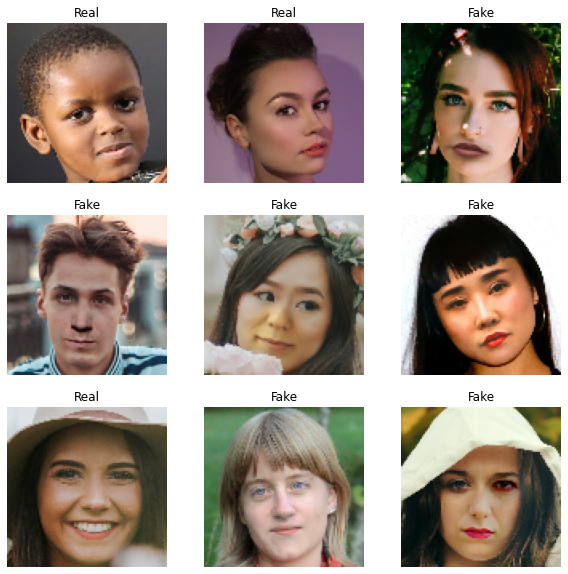

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in dataset_train.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")